In [1]:
#Do sanity checks
#Retrain agents with different seeds

import rlcard
from rlcard import models
from rlcard.agents import NFSPAgent, RandomAgent
from rlcard.utils import (
    get_device,
    set_seed,
    tournament,
    reorganize,
    Logger,
    plot_curve,
)
import numpy as np

In [2]:
import torch

In [3]:
# !python run_rl_multiagent.py

In [4]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

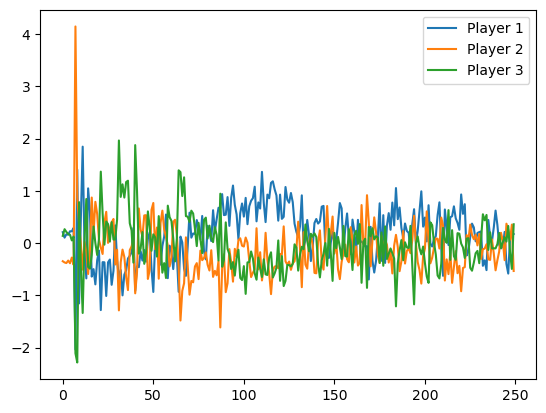

In [5]:
df = pd.read_csv(r'.\checkpoint_collab\performance.csv')
df['reward'] = df['reward'].apply(ast.literal_eval)
plt.plot(df['reward'].to_list())
plt.legend(("Player 1", "Player 2", "Player 3"))

In [43]:
eval_env = rlcard.make(
    'limit-holdem-collaborative',
    config={
        'game_num_players': 3,
    }
)

agent1 = torch.load(r'.\checkpoint_collab\collab_nfsp_friend1.pth')
agent2 = torch.load(r'.\checkpoint_collab\collab_nfsp_friend2.pth')
agent3 = torch.load(r'.\checkpoint_collab\collab_nfsp_comp3.pth')

In [44]:
eval_env.set_agents([
  agent1,
  agent2,
  agent3
])

In [45]:
agent1

In [46]:
a = [0 for _ in range(eval_env.num_players)]
win_num = [0 for _ in range(eval_env.num_players)]
for i in range(1000):
  eval_env.reset()
  trajectories, payoffs = eval_env.run(is_training=False)
  for idx in range(eval_env.num_players):
    # print(f"Player {idx}: {env.game.get_state(idx)['my_chips']}")
    a[idx] += payoffs[idx]
  win_num[np.argmax(payoffs)] += 1


In [47]:
print(a)
print(win_num)

[-390.5, -13.5, 404.0]
[301, 341, 358]


In [20]:
trajectories, payoffs = eval_env.run(is_training=False)
trajectories = reorganize(trajectories, payoffs)

In [28]:
eval_env.get_perfect_information()

{'chips': [28, 28, 28],
 'public_card': ['D8', 'CK', 'D5', 'S9', 'H3'],
 'hand_cards': [['SQ', 'S4'], ['H7', 'C5'], ['S2', 'SJ']],
 'current_player': 1,
 'legal_actions': ['raise', 'fold', 'check']}